# Boston House Prices

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('input/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

['housing.csv']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [2]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [3]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

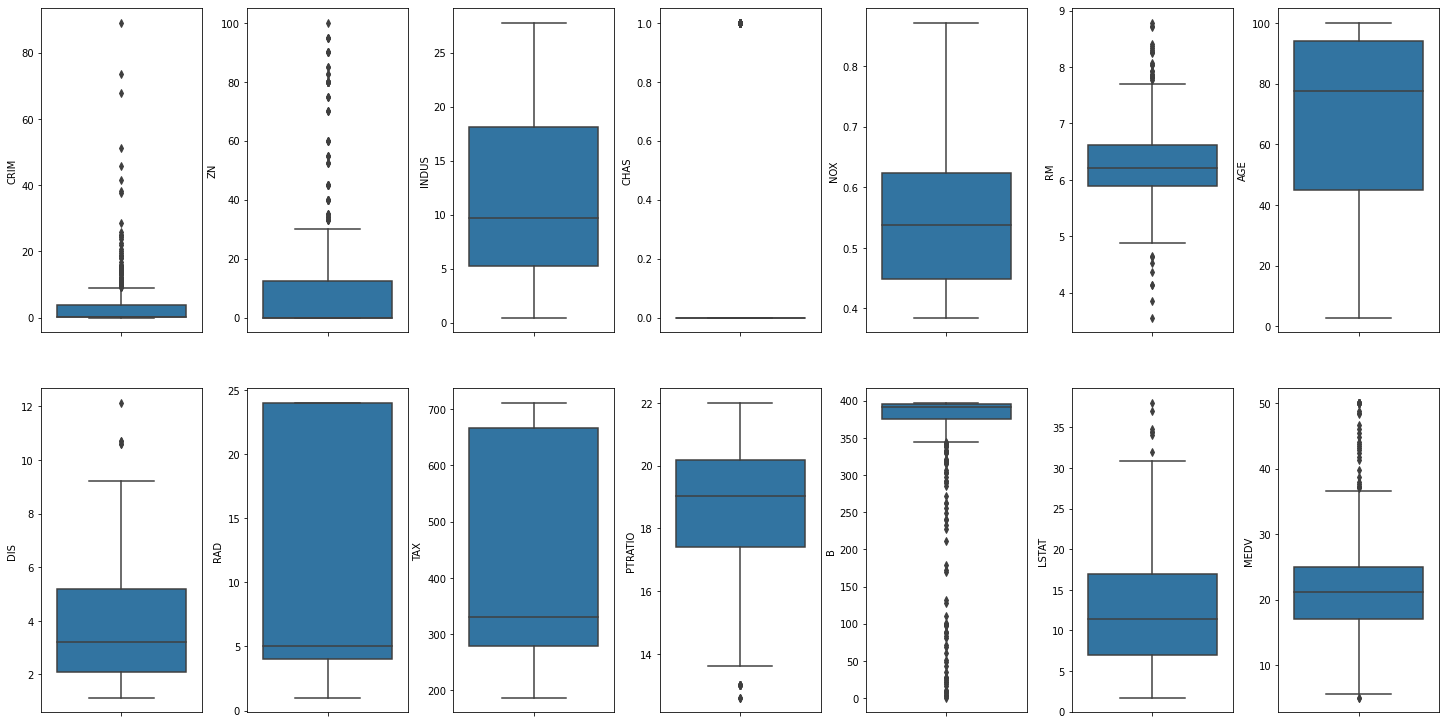

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [5]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [6]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


/home/jakobwaibel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


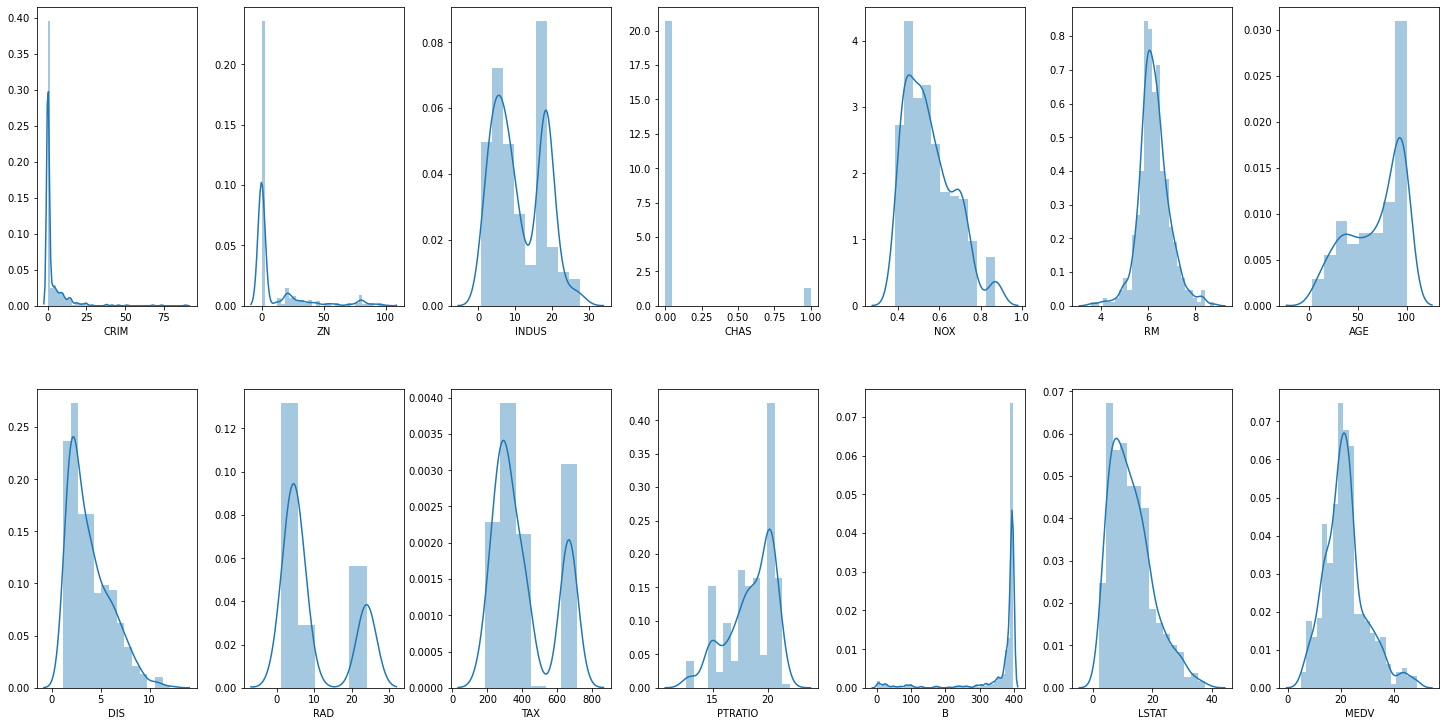

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

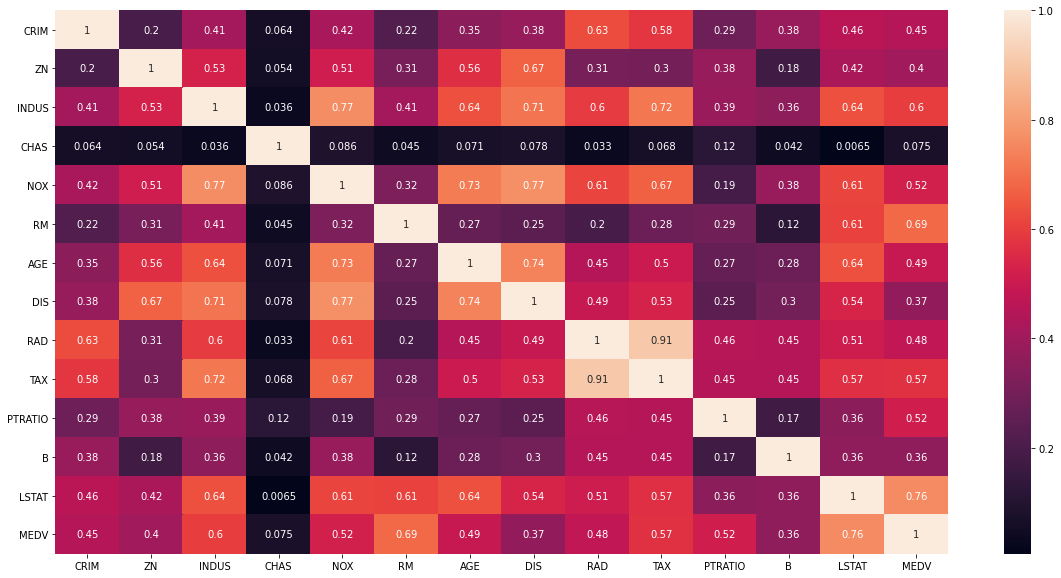

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

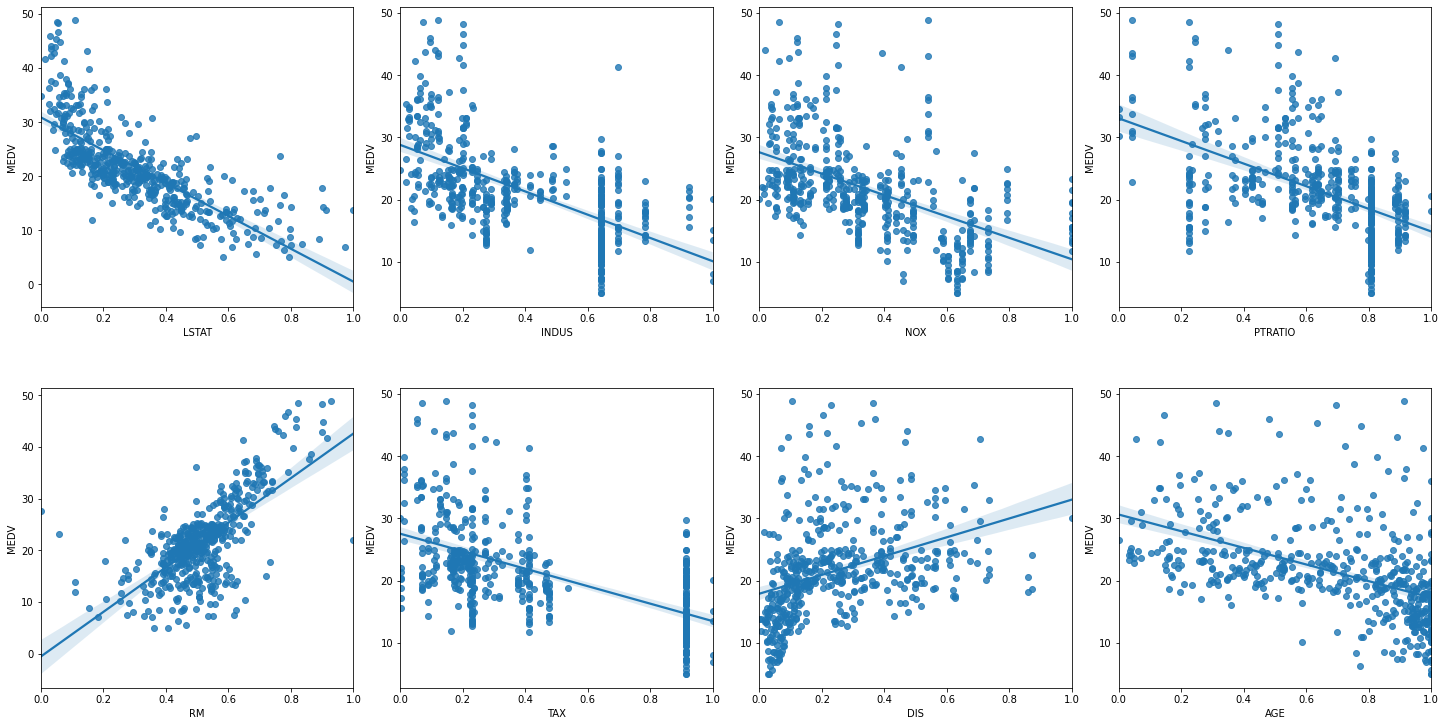

In [9]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [10]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

## Linear Regression

In [11]:
import numpy as np
import torch
from sklearn.datasets import load_boston
import pandas as pd

In [12]:
bos = load_boston()
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
print(df.iloc[:,-1:])
df.head()

     Price
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

data['Price'] = df.Price

In [16]:
X = data.drop('Price', axis=1).to_numpy()
# Don't use date['Price'].to_numpy() in this case. It would return the shape (506) and therefore is not the same shape as the inputs
Y = df.iloc[:,-1:].to_numpy()
Y
Y.shape

(506, 1)

In [17]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506, 1)


In [18]:
inputs = torch.from_numpy(X)
inputs = inputs.float()
targets = torch.from_numpy(Y)
targets = targets.float()
print(inputs)
print(targets)

tensor([[-0.4194,  0.2845, -1.2866,  ..., -1.4576,  0.4406, -1.0745],
        [-0.4169, -0.4872, -0.5928,  ..., -0.3028,  0.4406, -0.4920],
        [-0.4169, -0.4872, -0.5928,  ..., -0.3028,  0.3960, -1.2075],
        ...,
        [-0.4130, -0.4872,  0.1156,  ...,  1.1753,  0.4406, -0.9821],
        [-0.4074, -0.4872,  0.1156,  ...,  1.1753,  0.4028, -0.8644],
        [-0.4146, -0.4872,  0.1156,  ...,  1.1753,  0.4406, -0.6684]])
tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.000

In [19]:
import torch.nn as nn

In [20]:
from torch.utils.data import TensorDataset

In [21]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[-0.4194,  0.2845, -1.2866, -0.2723, -0.1441,  0.4133, -0.1199,  0.1401,
          -0.9819, -0.6659, -1.4576,  0.4406, -1.0745],
         [-0.4169, -0.4872, -0.5928, -0.2723, -0.7395,  0.1941,  0.3668,  0.5566,
          -0.8670, -0.9864, -0.3028,  0.4406, -0.4920],
         [-0.4169, -0.4872, -0.5928, -0.2723, -0.7395,  1.2814, -0.2655,  0.5566,
          -0.8670, -0.9864, -0.3028,  0.3960, -1.2075]]),
 tensor([[24.0000],
         [21.6000],
         [34.7000]]))

In [22]:
from torch.utils.data import DataLoader

In [23]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [24]:
for xb, yb in train_dl: 
    print(xb)
    print(yb)
    break

tensor([[ 0.1846, -0.4872,  1.0150,  3.6648,  1.8580, -0.2244,  0.5267, -0.5093,
          1.6596,  1.5294,  0.8058,  0.4245, -0.1643],
        [-0.4072, -0.4872,  0.4013,  3.6648, -0.0405, -0.4748,  0.8961, -0.4301,
         -0.5225, -0.7846, -0.9495,  0.4406,  0.7376],
        [-0.3316,  0.3703, -1.0447, -0.2723,  0.7966, -1.0313, -0.2052, -0.8589,
         -0.5225, -0.8558, -2.5199,  0.3913, -0.3085],
        [-0.3680, -0.4872, -0.7196,  3.6648, -0.4116,  0.6282, -0.0737, -0.0680,
         -0.1779, -0.6007, -0.4876,  0.0386, -0.6446],
        [-0.3817, -0.4872, -0.7196, -0.2723, -0.4116, -0.2827, -0.2513, -0.0680,
         -0.1779, -0.6007, -0.4876,  0.2199, -0.2483]])
tensor([[22.7000],
        [21.5000],
        [22.8000],
        [29.0000],
        [24.0000]])


In [25]:
# Define model
model = nn.Linear(13,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0396, -0.1407,  0.1725, -0.1686,  0.2677, -0.0661,  0.1794,  0.0669,
         -0.2527, -0.1582,  0.0456, -0.1850,  0.0607]], requires_grad=True)
Parameter containing:
tensor([0.2161], requires_grad=True)


In [26]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0396, -0.1407,  0.1725, -0.1686,  0.2677, -0.0661,  0.1794,  0.0669,
          -0.2527, -0.1582,  0.0456, -0.1850,  0.0607]], requires_grad=True),
 Parameter containing:
 tensor([0.2161], requires_grad=True)]

In [27]:
# Generate predictions 
preds = model(inputs.float())
preds

tensor([[ 0.0457],
        [ 0.3540],
        [ 0.1335],
        [-0.0641],
        [-0.0088],
        [ 0.0918],
        [ 0.2290],
        [ 0.4690],
        [ 0.6616],
        [ 0.4435],
        [ 0.4711],
        [ 0.3589],
        [ 0.0994],
        [ 0.4112],
        [ 0.5854],
        [ 0.3859],
        [ 0.2068],
        [ 0.5955],
        [ 0.5166],
        [ 0.4903],
        [ 0.8016],
        [ 0.6193],
        [ 0.6519],
        [ 0.7530],
        [ 0.6836],
        [ 0.8488],
        [ 0.7011],
        [ 0.8274],
        [ 0.6168],
        [ 0.5576],
        [ 0.8226],
        [ 0.7109],
        [ 1.0185],
        [ 0.7821],
        [ 0.9990],
        [ 0.2345],
        [ 0.2544],
        [ 0.0828],
        [ 0.0161],
        [-0.7293],
        [-0.8278],
        [-0.2230],
        [-0.1304],
        [-0.1435],
        [ 0.1113],
        [ 0.0791],
        [ 0.0997],
        [ 0.4762],
        [ 0.6974],
        [ 0.3488],
        [-0.0281],
        [ 0.0367],
        [-0.

### Loss Function

In [28]:
# Import nn.functional 
import torch.nn.functional as F

In [29]:
# Define loss function
loss_fn = F.mse_loss
print(type(inputs))
print(type(targets))
print(inputs.shape)
print(targets.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([506, 13])
torch.Size([506, 1])


In [30]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(589.2303, grad_fn=<MseLossBackward>)


### Opimtimizer

In [31]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

### Train the model

In [32]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    
    # Repeat for a given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred,yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [70]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 339.1815
Epoch [20/100], Loss: 22.5920
Epoch [30/100], Loss: 3.5692
Epoch [40/100], Loss: 0.8527
Epoch [50/100], Loss: 2.2653
Epoch [60/100], Loss: 12.7068
Epoch [70/100], Loss: 0.4456
Epoch [80/100], Loss: 1.1487
Epoch [90/100], Loss: 25.1993
Epoch [100/100], Loss: 0.0224


In [71]:
# Generate predictions
preds = model(inputs)
preds

tensor([[30.5606],
        [24.9417],
        [30.9100],
        [29.3451],
        [28.8150],
        [25.6253],
        [23.0285],
        [19.9092],
        [11.9465],
        [19.4617],
        [19.7438],
        [21.8532],
        [21.0709],
        [20.2000],
        [19.8456],
        [19.8105],
        [21.2076],
        [17.4852],
        [16.3048],
        [18.5503],
        [12.7451],
        [18.0489],
        [16.4774],
        [14.2726],
        [16.2606],
        [13.7993],
        [16.0634],
        [15.4278],
        [20.4056],
        [21.7698],
        [12.0353],
        [18.5015],
        [ 9.6316],
        [14.5004],
        [14.1939],
        [22.9880],
        [21.5538],
        [22.6131],
        [22.5683],
        [30.0737],
        [33.1669],
        [28.3496],
        [25.1504],
        [24.6457],
        [22.7610],
        [21.4414],
        [19.9743],
        [17.8764],
        [ 8.9727],
        [16.9950],
        [20.9839],
        [23.5354],
        [27.

In [72]:
# Compare with targets
targets

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.0000],
        [12.7000],
        [14.5000],
        [13.2000],
        [13.1000],
        [13.5000],
        [18.9000],
        [20.0000],
        [21.0000],
        [24.7000],
        [30.8000],
        [34.9000],
        [26.6000],
        [25.3000],
        [24.7000],
        [21.2000],
        [19.3000],
        [20.0000],
        [16.6000],
        [14.4000],
        [19.4000],
        [19.7000],
        [20.5000],
        [25.